In [2]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.fraunhofer_coro_1 as fraunhofer1
import apra_pop_models.fraunhofer_coro_2 as fraunhofer2
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils
import apra_pop_models.efc_utils as efc_utils
import apra_pop_models.efc_2dm as efc
import apra_pop_models.pwp as pwp

from apra_pop_models.imshows import *

from apra_pop_models import fresnel_ote

In [3]:
reload(apra_pop_models.props)
model_small = fraunhofer1.CORO()
model_small.npsf = 100
model_big = fraunhofer2.CORO()
model_big.npsf = 200

influence function sampling 31.25
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
influence function sampling 15.625
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


In [4]:
post_bw_small_dm_ims = xp.array(fits.getdata('../efc-data/smallDM_efc_afterBW_ims.fits'))
post_bw_big_dm_ims = xp.array(fits.getdata('../efc-data/bigDM_efc_afterBW_ims.fits'))

control_mask_small = efc_utils.create_annular_focal_plane_mask(model_small, 2.5, 12)
control_mask_big = efc_utils.create_annular_focal_plane_mask(model_big, 2.5, 26)

mean_ni_small = xp.mean(post_bw_small_dm_ims[-1][control_mask_small])
mean_ni_big = xp.mean(post_bw_small_dm_ims[-2][control_mask_small])
mean_ni_small, mean_ni_big

(array(1.09056833e-10), array(1.85946535e-10))

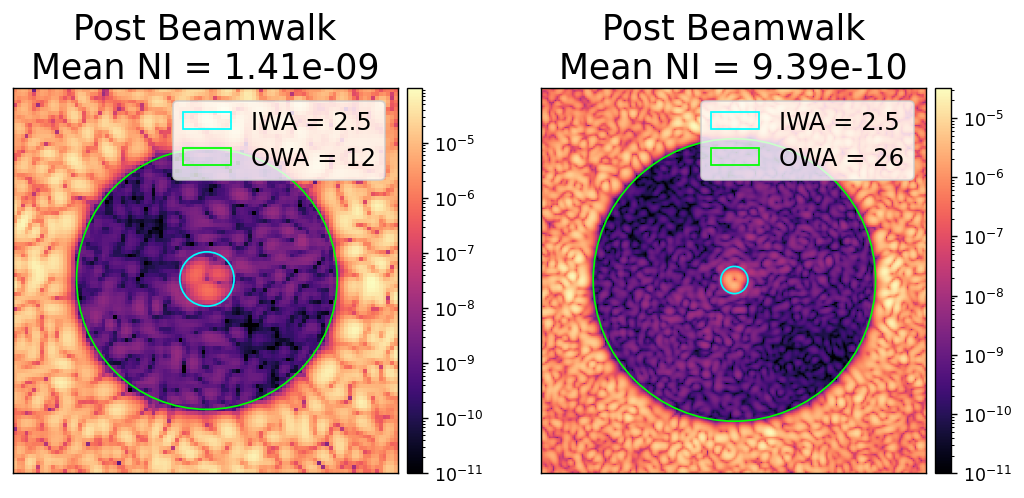

In [16]:

mean_ni_small = xp.mean(post_bw_small_dm_ims[0][control_mask_small])
mean_ni_big = xp.mean(post_bw_big_dm_ims[0][control_mask_big])
mean_ni_small, mean_ni_big

pxscl = model_small.psf_pixelscale_lamD
fig,ax = imshow2(post_bw_small_dm_ims[0], post_bw_big_dm_ims[0], cmap1='magma', cmap2='magma', 
                lognorm=True, vmin1=1e-11, vmin2=1e-11,
                pxscl=pxscl,
                patches1=[Circle((pxscl/2, pxscl/2), 2.5, fill=False, color='cyan', label='IWA = 2.5'),
                         Circle((pxscl/2, pxscl/2), 12, fill=False, color='lime', label='OWA = 12'),],
                patches2=[Circle((pxscl/2, pxscl/2), 2.5, fill=False, color='cyan', label='IWA = 2.5'),
                         Circle((pxscl/2, pxscl/2), 26, fill=False, color='lime', label='OWA = 26'),],
                display_fig=False, return_fig=True,)
ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='upper right', fontsize=14)
ax[0].set_title(f'Post Beamwalk\nMean NI = {mean_ni_small:.2e}', fontsize=20)
ax[1].set_title(f'Post Beamwalk\nMean NI = {mean_ni_big:.2e}', fontsize=20)
ticks = np.linspace(-15,15,7)
ticks = []
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)
display(fig)

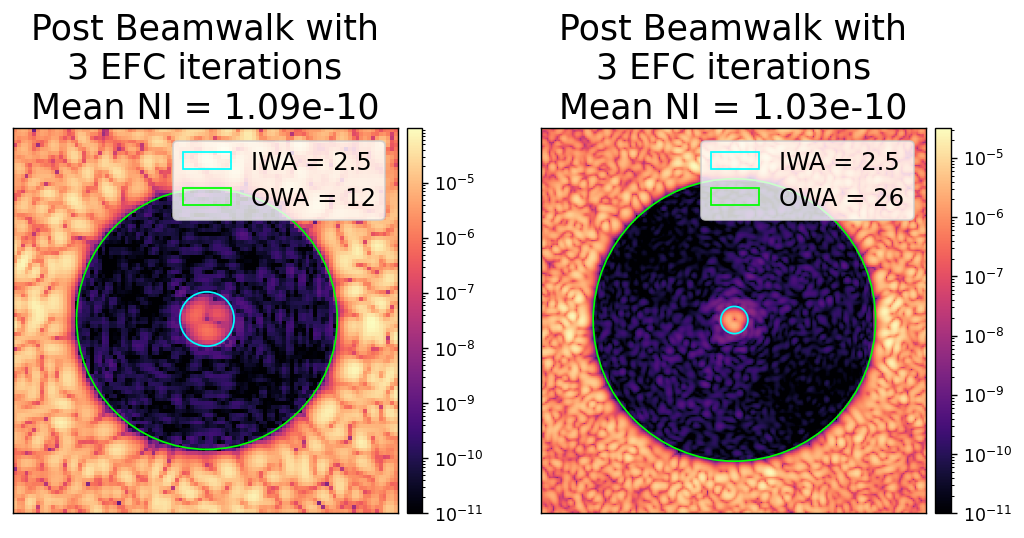

In [14]:

mean_ni_small = xp.mean(post_bw_small_dm_ims[-1][control_mask_small])
mean_ni_big = xp.mean(post_bw_big_dm_ims[-2][control_mask_big])
mean_ni_small, mean_ni_big

pxscl = model_small.psf_pixelscale_lamD
fig,ax = imshow2(post_bw_small_dm_ims[-1], post_bw_big_dm_ims[-2], cmap1='magma', cmap2='magma', 
                lognorm=True, vmin1=1e-11, vmin2=1e-11,
                pxscl=pxscl,
                patches1=[Circle((pxscl/2, pxscl/2), 2.5, fill=False, color='cyan', label='IWA = 2.5'),
                         Circle((pxscl/2, pxscl/2), 12, fill=False, color='lime', label='OWA = 12'),],
                patches2=[Circle((pxscl/2, pxscl/2), 2.5, fill=False, color='cyan', label='IWA = 2.5'),
                         Circle((pxscl/2, pxscl/2), 26, fill=False, color='lime', label='OWA = 26'),],
                display_fig=False, return_fig=True,)
ax[0].legend(loc='upper right', fontsize=14)
ax[1].legend(loc='upper right', fontsize=14)
ax[0].set_title(f'Post Beamwalk with\n3 EFC iterations\nMean NI = {mean_ni_small:.2e}', fontsize=20)
ax[1].set_title(f'Post Beamwalk with\n3 EFC iterations\nMean NI = {mean_ni_big:.2e}', fontsize=20)
ticks = np.linspace(-15,15,7)
ticks = []
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)
display(fig)

In [ ]:
itrs = range(fourier_contrast.shape[0])

fig,ax1 = plt.subplots(dpi=125)
ax1.semilogy(itrs, fourier_small_contrast, label='Fourier Modes')
ax1.semilogy(itrs, fourier_contrast, label='Extended Fourier Modes')
ax1.semilogy(itrs, poke_contrast, label='Single Actuator Modes')
ax1.semilogy(itrs, had_contrast, label='Hadamard Modes', color='purple')
ax1.set_xlabel('Iterations', fontsize=14, )
ax1.set_ylabel('Mean Contrast', fontsize=14,)
ax1.set_ylim([5e-11, 5e-6])
ax1.set_xticks(np.arange(0,30+1, 3))
# ax1.legend()
ax1.set_title('iEFC Mean Contrast and $\\beta$ per Iteration', fontsize=14)
ax1.legend(bbox_to_anchor=(1.7, 0.65), fontsize=12)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('$\\beta$  Values', fontsize=14, rotation=-90, labelpad = 20)
ax2.plot(itrs[1:], poke_regs, '-o', color='red',)
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.set_ylim([-7, -2])
plt.savefig('figs/iefc_mode_comp_plots.pdf', format='pdf', bbox_inches="tight")